# Insult Classification

In this exercise, we would like to filter out insulting comments on a web forum. 

To train our models, we have a list of historic comments with a judgement wether they're insulting or not.

In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
from pandas import Series
%matplotlib inline
path_to_insults = 'data/'
bots_data = pd.read_csv(path_to_insults + 'bots_data.csv')
nonbots_data = pd.read_csv(path_to_insults + 'nonbots_data.csv')
bots_data.head(2)

id      id_str   screen_name location  \
0  3.982732e+09  3982731976  mcgucket_bot      NaN   
1  8.410000e+17    8.41E+17      BowieK66      NaN   

                                         description  url  followers_count  \
0  A bot that tweets every line said by Fiddlefor...  NaN             1129   
1                                                NaN  NaN                0   

   friends_count  listedcount                      created_at  \
0              7            2  Sat Oct 17 22:35:31 +0000 2015   
1             22            0                13/03/2017 22:21   

   favourites_count verified  statuses_count lang  \
0                 0    False           23557   en   
1                 0    False               1   en   

                                              status default_profile  \
0  {'retweeted': False, 'is_quote_status': False,...           False   
1  Status(_api=<tweepy.api.API object at 0x101927...            True   

  default_profile_image has_extended_profile          name  bot  
0                 False                False  McGucket bot    1  
1                  True                False       MJ Kuhn    1

In [15]:
print(bots_data.shape)
print(nonbots_data.shape)

(1056, 20)
(1176, 20)


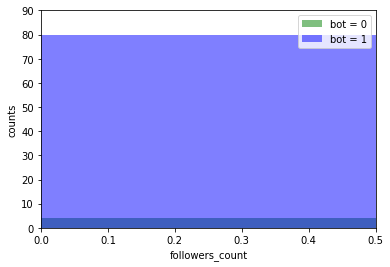

In [215]:
# bot has 80 counts of zero followers_count, nonbot has only 4 count of zero followers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = numpy.linspace(0,0.5, 2)
pyplot.hist(x, bins,alpha=0.5,facecolor='g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,facecolor ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('followers_count')
pyplot.axis([0,0.5,0,90])
pyplot.legend(loc='upper right')
pyplot.show()

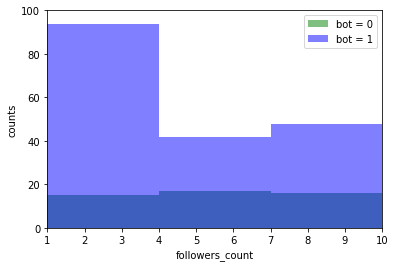

In [214]:
# in this range, bot has 188 counts of followers_count, nonbot has only 48 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = numpy.linspace(1,10,4)
pyplot.hist(x, bins,alpha=0.5,facecolor='g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,facecolor ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('followers_count')
pyplot.axis([1,10,0,100])
pyplot.legend(loc='upper right')
pyplot.show()

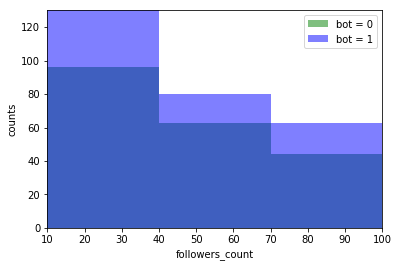

In [212]:
# in this range, bot has 275 counts of followers_count, nonbot has only 205 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = numpy.linspace(10,100,4)
pyplot.hist(x, bins,alpha=0.5,facecolor='g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,facecolor ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('followers_count')
pyplot.axis([10,100,0,130])
pyplot.legend(loc='upper right')
pyplot.show()

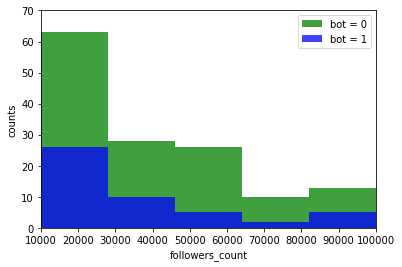

In [205]:
# in this range, bot has 50 counts of followers_count, nonbot has only 140 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = numpy.linspace(10000,100000,6)
pyplot.hist(x, bins,alpha=0.75,facecolor='g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.75,facecolor ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('followers_count')
pyplot.axis([10000,100000,0,70])
pyplot.legend(loc='upper right')
pyplot.show()

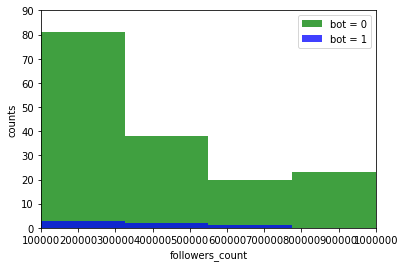

In [203]:
# in this range, bot has 6 counts of followers_count, nonbot has only 160 count offollowers_count
x = nonbots_data['followers_count']
y = bots_data['followers_count']
bins = numpy.linspace(100000,1000000,5)
pyplot.hist(x, bins,alpha=0.75,facecolor='g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.75,facecolor ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('followers_count')
pyplot.axis([100000,1000000,0,90])
pyplot.legend(loc='upper right')
pyplot.show()

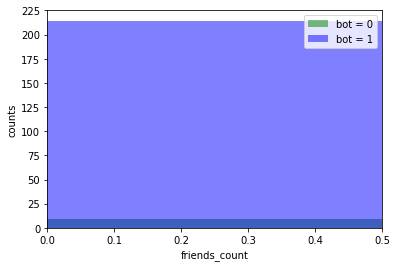

In [210]:
# bot has 215 counts of zero friends_count, nonbot has only 9 count of zero friends_count
x = nonbots_data['friends_count']
y = bots_data['friends_count']
bins = numpy.linspace(0,0.5, 2)
pyplot.hist(x, bins,alpha=0.5,facecolor = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,facecolor ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('friends_count')
pyplot.axis([0,0.5,0,225])
pyplot.legend(loc='upper right')
pyplot.show()

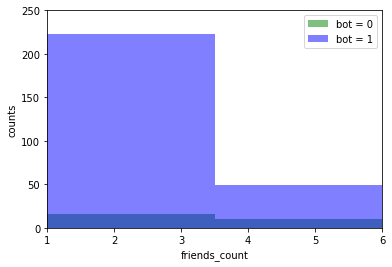

In [186]:
# in this range, bot has 275 counts of friends_count, nonbot has only 25 count of friends_count
x = nonbots_data['friends_count'] 
y = bots_data['friends_count']
bins = numpy.linspace(1,6,3)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('friends_count')
pyplot.axis([1,6,0,250])
pyplot.legend(loc='upper right')
pyplot.show()

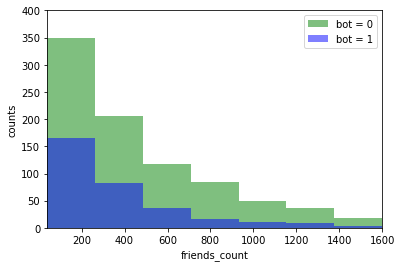

In [185]:
# in this range, bot has 325 counts offriends_count, nonbot has 875 count of friends_count
x = nonbots_data['friends_count'] 
y = bots_data['friends_count']
bins = numpy.linspace(40,1600,8)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('friends_count')
pyplot.axis([40,1600,0,400])
pyplot.legend(loc='upper right')
pyplot.show()

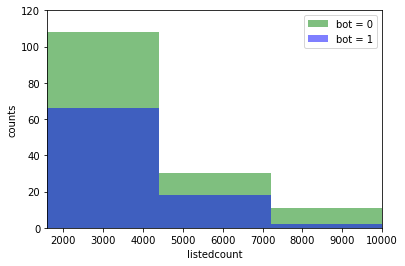

In [182]:
# in this range, bot has 85 counts offriends_count, nonbot has 150 count of friends_count
x = nonbots_data['friends_count'] 
y = bots_data['friends_count']
bins = numpy.linspace(1600,10000,4)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('friends_count')
pyplot.axis([1600,10000,0,120])
pyplot.legend(loc='upper right')
pyplot.show()

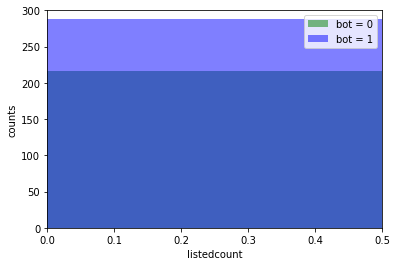

In [181]:
# bot has 285 counts of zero listed_count, nonbot has 220 count of zero listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = numpy.linspace(0,0.5, 2)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('listedcount')
pyplot.axis([0,0.5,0,300])
pyplot.legend(loc='upper right')
pyplot.show()

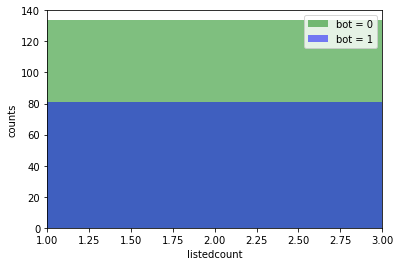

In [180]:
# in this range, bot has 80 counts of listed_count, nonbot has 135 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = numpy.linspace(1,3,2)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('listedcount')
pyplot.axis([1,3,0,140])
pyplot.legend(loc='upper right')
pyplot.show()

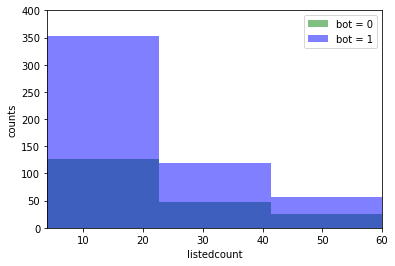

In [179]:
# in this range, bot has 525 counts of listed_count, nonbot has 200 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = numpy.linspace(4,60,4)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('listedcount')
pyplot.axis([4,60,0,400])
pyplot.legend(loc='upper right')
pyplot.show()

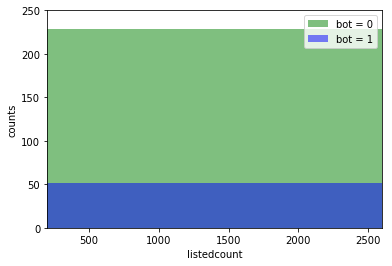

In [175]:
# in this range, bot has 50 counts of listed_count, nonbot has 240 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = numpy.linspace(200,2600,2)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('listedcount')
pyplot.axis([200,2600,0,250])
pyplot.legend(loc='upper right')
pyplot.show()

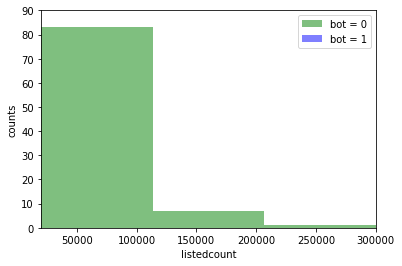

In [176]:
# in this range, bot has 0 counts of listed_count, nonbot has 92 counts of listed_count
x = nonbots_data['listedcount']
y = bots_data['listedcount']
bins = numpy.linspace(20000,300000,4)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('listedcount')
pyplot.axis([20000,300000,0,90])
pyplot.legend(loc='upper right')
pyplot.show()

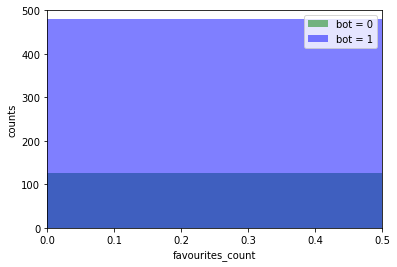

In [178]:
# bot has 480 counts of zero listed_count, nonbot has  120 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = numpy.linspace(0,0.5, 2)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('favourites_count')
pyplot.axis([0,0.5,0,500])
pyplot.legend(loc='upper right')
pyplot.show()

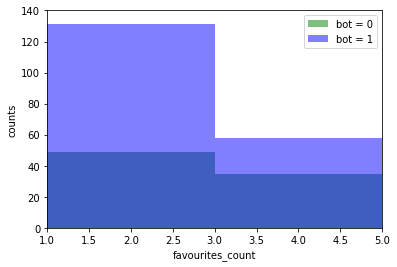

In [171]:
# bot has 188 counts of zero listed_count, nonbot has  85 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = numpy.linspace(1,5,3)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('favourites_count')
pyplot.axis([1,5,0,140])
pyplot.legend(loc='upper right')
pyplot.show()

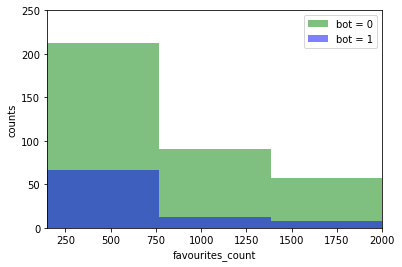

In [168]:
# bot has 85 counts of zero listed_count, nonbot has 360 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = numpy.linspace(150,2000,4)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('favourites_count')
pyplot.axis([150,2000,0,250])
pyplot.legend(loc='upper right')
pyplot.show()

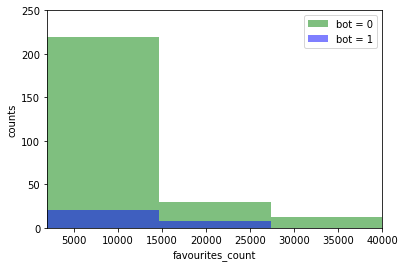

In [157]:
# bot has 25 counts of zero listed_count, nonbot has  265 count of zero listed_count
x = nonbots_data['favourites_count']
y = bots_data['favourites_count']
bins = numpy.linspace(2000,40000,4)
pyplot.hist(x, bins,alpha=0.5,color = 'g',label='bot = 0')
pyplot.hist(y, bins,alpha=0.5,color ='b',label='bot = 1')
pyplot.ylabel('counts')
pyplot.xlabel('favourites_count')
pyplot.axis([2000,40000,0,250])
pyplot.legend(loc='upper right')
pyplot.show()

In [145]:
#fill NaN with 'missing'
all_data_nafill = all_data.fillna('missing')

#encode string with utf-8
all_data_nafill['description'] = all_data_nafill['description'].str.decode('iso-8859-1').str.encode('utf-8')

# Train CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_comment_counts = count_vect.fit_transform(all_data_nafill.description)

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_comment_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 75.044803%
Precision: 82.872200%
Recall: 59.564394%
F1: 69.311295%
AUC: 74.254986%


In [152]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_comment_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 74.193548%
Precision: 75.917927%
Recall: 66.571970%
F1: 70.938446%
AUC: 73.804692%


In [ ]:
#join two dataframe
frame = [bots_data, nonbots_data]
all_data = pd.concat(frame)
all_data.shape

In [255]:
#split data to train dataset and test dataset
from sklearn.cross_validation import cross_val_score,train_test_split
X_verified =all_data.verified
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_verified, y_bot,random_state = 1)

In [256]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 69.534050%
Precision: 60.620525%
Recall: 98.069498%
F1: 74.926254%
AUC: 71.442776%


In [250]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 69.534050%
Precision: 60.620525%
Recall: 98.069498%
F1: 74.926254%
AUC: 71.442776%


In [251]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 53.584229%
Precision: 0.000000%
Recall: 0.000000%
F1: 0.000000%
AUC: 50.000000%


In [253]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 69.534050%
Precision: 60.620525%
Recall: 98.069498%
F1: 74.926254%
AUC: 71.442776%


In [254]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train.values.reshape(-1,1), y_train)
logistic_predict = logistic.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, logistic_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, logistic_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, logistic_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, logistic_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, logistic_predict)) + '%')

Accuracy: 69.534050%
Precision: 60.620525%
Recall: 98.069498%
F1: 74.926254%
AUC: 71.442776%


In [257]:
#split data to train dataset and test dataset
from sklearn.cross_validation import cross_val_score,train_test_split
X_default_profile_image =all_data.default_profile_image
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_default_profile_image, y_bot,random_state = 1)

In [258]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 56.272401%
Precision: 82.608696%
Recall: 7.335907%
F1: 13.475177%
AUC: 52.999057%


In [259]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 56.272401%
Precision: 82.608696%
Recall: 7.335907%
F1: 13.475177%
AUC: 52.999057%


In [260]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 56.272401%
Precision: 82.608696%
Recall: 7.335907%
F1: 13.475177%
AUC: 52.999057%


In [264]:
#split data to train dataset and test dataset
from sklearn.cross_validation import cross_val_score,train_test_split
X_default_profile =all_data.default_profile
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_default_profile, y_bot,random_state = 1)

In [265]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 70.609319%
Precision: 69.076305%
Recall: 66.409266%
F1: 67.716535%
AUC: 70.328379%


In [266]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 70.609319%
Precision: 69.076305%
Recall: 66.409266%
F1: 67.716535%
AUC: 70.328379%


In [287]:
all_data['has_extended_profile'].isnull().any()
all_data_edited = all_data['has_extended_profile'].fillna(method = 'ffill')

In [289]:

from sklearn.cross_validation import cross_val_score,train_test_split
X_has_extended_profile = all_data_edited
y_bot =all_data.bot
X_train, X_test, y_train, y_test = train_test_split(X_has_extended_profile, y_bot,random_state = 1)

In [290]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB().fit(X_train.values.reshape(-1,1), y_train)
bayes_predict = bayes.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, bayes_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, bayes_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, bayes_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, bayes_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, bayes_predict)) + '%')

Accuracy: 52.508961%
Precision: 49.367089%
Recall: 90.347490%
F1: 63.847203%
AUC: 55.039966%


In [291]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train.values.reshape(-1,1), y_train)
rf_predict = rf.predict(X_test.values.reshape(-1,1))
from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(y_test, rf_predict)) + '%')
print('Precision: %f' % (100*metrics.precision_score(y_test, rf_predict)) + '%')
print('Recall: %f' % (100*metrics.recall_score(y_test, rf_predict)) + '%')
print('F1: %f' % (100*metrics.f1_score(y_test, rf_predict)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(y_test, rf_predict)) + '%')

Accuracy: 52.508961%
Precision: 49.367089%
Recall: 90.347490%
F1: 63.847203%
AUC: 55.039966%


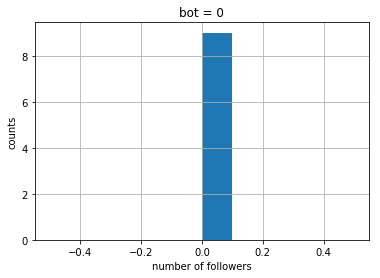

In [117]:
followers_pattern_nonbot = nonbots_data[['friends_count']]
followers_plot = followers_pattern_nonbot['friends_count'].hist(bins=10, range =(0, 0))
followers_plot.set_title('bot = 0')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')
followers_plot

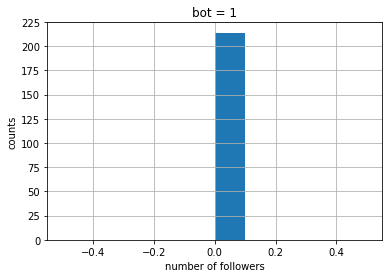

In [54]:
followers_pattern = bots_data[['friends_count']]
followers_plot = followers_pattern['friends_count'].hist(bins=10,range = (0,0))
followers_plot.set_title('bot = 1')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')

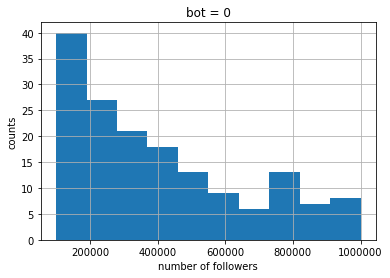

In [123]:
followers_pattern_nonbot = nonbots_data[['followers_count']]
followers_plot = followers_pattern_nonbot['followers_count'].hist(bins=10, range =(100000, 1000000))
followers_plot.set_title('bot = 0')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')
followers_plot

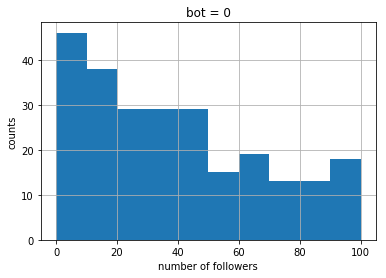

In [124]:
followers_pattern_nonbot = nonbots_data[['followers_count']]
followers_plot = followers_pattern_nonbot['followers_count'].hist(bins=10, range =(0, 100))
followers_plot.set_title('bot = 0')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')
followers_plot

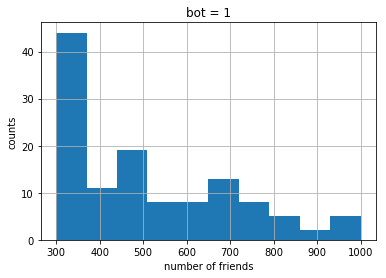

In [135]:
friends_pattern_bots = bots_data[['friends_count']]
friends_plot = friends_pattern_bots['friends_count'].hist(bins=10, range=(300,1000))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of friends')
friends_plot.set_ylabel('counts')
friends_plot

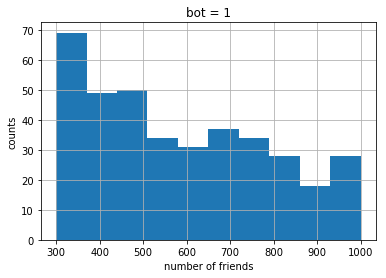

In [136]:
friends_pattern_nonbots = nonbots_data[['friends_count']]
friends_plot = friends_pattern_nonbots['friends_count'].hist(bins=10, range=(300,1000))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of friends')
friends_plot.set_ylabel('counts')
friends_plot

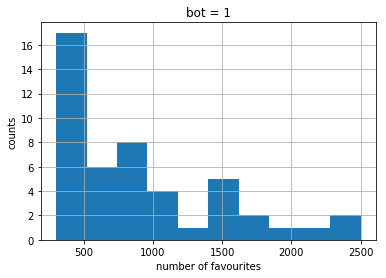

In [137]:
friends_pattern_bots = bots_data[['favourites_count']]
friends_plot = friends_pattern_bots['favourites_count'].hist(bins=10, range=(300,2500))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of favourites')
friends_plot.set_ylabel('counts')
friends_plot

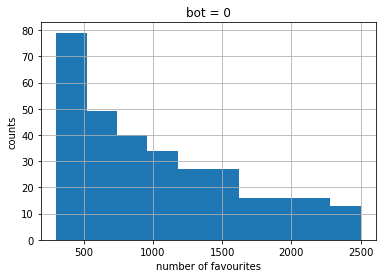

In [138]:
friends_pattern_nonbots = nonbots_data[['favourites_count']]
friends_plot = friends_pattern_nonbots['favourites_count'].hist(bins=10, range=(300,2500))
friends_plot.set_title('bot = 0')
friends_plot.set_xlabel('number of favourites')
friends_plot.set_ylabel('counts')
friends_plot

In [144]:
#join two dataframe
frame = [bots_data, nonbots_data]
all_data = pd.concat(frame)
all_data.shape

(2232, 20)

In [146]:
# Train CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_comment_counts = count_vect.fit_transform(all_data['default_profile'])

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_comment_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

AttributeError: 'numpy.bool_' object has no attribute 'lower'

In [145]:
all_data_nafill['status'].apply(pd.Series)

NameError: name 'all_data_nafill' is not defined

In [141]:
from sklearn.cross_validation import train_test_split
y = df.pop('output')
X = df
X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
X.iloc[X_train] # return dataframe train

C:\Users\jiaow\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'df' is not defined